In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.ndimage as ndimage
import scipy.ndimage as nd
import scipy.interpolate as interpolate
import seaborn as sns
from matplotlib import rcParams
import math
import pandas as pd
%matplotlib inline

In [4]:
rcParams['font.sans-serif'] = ['Arial'] 
rcParams['font.size'] = 6 #7
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['axes.linewidth'] = 0.5
rcParams['lines.linewidth'] = 0.5
rcParams['lines.markersize'] = 2.5
rcParams['lines.markeredgewidth'] = 0.0

rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5

to_inch = 0.393701
fwidth_cm = 10 #10. # cm
fheight_cm = 10. # cm

spwidth_cm = 1.5
spheight_cm = 3.
w = spwidth_cm/fwidth_cm
h = spheight_cm/fheight_cm
fwidth_inch = fwidth_cm * to_inch
fheight_inch = fheight_cm * to_inch

cmap = plt.cm.magma

lw_scatter = 0.4
ticks_fontsize = 6. 
spines_thickness = 0.5
ticks_width = spines_thickness
s_scatter = 8  
lw_stats_bar = 0.6
lw_scatter = 0.2
alpha_scatter = 0.6
width_bars = 1.5
tick_length = 3.
markersize_rasterdots = 1.5 
fs = 6.
lw = 0.3
despine_offset = 2

color_mpw = np.array([242,101,34])/255
color_su = [0.3,0.3,0.3] 
color_EXC = 'dimgray' 
color_INH = np.array([62,185,236.])/255 
    

In [5]:
def calc_rf_center(rf,thr):
    rf_tmp = rf.copy() # to avoid that the original rf gets changed
    rf_tmp[np.abs(rf_tmp)<= thr] = 0. # this sets all noise pixel to 0. If this is not done the center_of_mass will always be the center of the matrix, which is wrong.
    (x,y)= ndimage.measurements.center_of_mass(rf_tmp)
    
    return x,y,rf_tmp

In [6]:
data_dir = '/.../Data/' 

## Plot Panels 1 E and F

In [7]:
selected_clusters = [255, 643, 641] 
RGCs = [0, 0, 1] 
cl_labels = ['EXC', 'INH', 'RGC']
colors_array = [color_EXC, color_INH, color_mpw]

Fig1EF_Data = np.load(data_dir + 'Fig1EF_Data.npy', encoding='latin1', allow_pickle=True).item() 
sta_opto = Fig1EF_Data['sta_opto'] 
raster_trials = Fig1EF_Data['raster_trials'] 
raster_times = Fig1EF_Data['raster_times'] 
psths_CorrSparse = Fig1EF_Data['psths_CorrSparse'] 
RasterTrials_NaturalMovie = Fig1EF_Data['RasterTrials_NaturalMovie'] 
RasterTimes_NaturalMovie = Fig1EF_Data['RasterTimes_NaturalMovie'] 

0 255
1 643
2 641


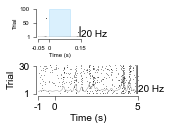

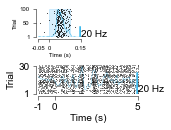

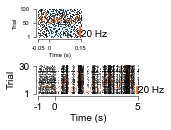

In [10]:
n_trials_NaturalMovie = 30

stim_dur_optotagging_s = 0.1
n_trials_optotagging = 100

lim_time_s = [-0.05, 0.15]
bin_width_s_optotagging = 0.001 
psth_range_s_optotagging = np.arange(-0.5, 1.5, bin_width_s_optotagging)  
to_spikes_per_second = 1/bin_width_s_optotagging

bin_width_s_NatMov = 0.01
psth_range_s_NatMov = np.arange(-1,16, bin_width_s_NatMov) # s
to_spikes_per_second_NatMov = 1/bin_width_s_NatMov

for idx, cl in enumerate(selected_clusters):
    print(idx, cl)
    
    cl_label_observer = cl_labels[idx] 
    color_tmp = colors_array[idx]
    
    fig = plt.figure(cl)
    plt.clf()
    fig.set_size_inches(fwidth_inch,fheight_inch)
    
   # Optotagging Raster
    ax = plt.axes([0.1,0.3,0.15,0.1])   
    ax.tick_params(length=tick_length)
    ax.tick_params(labelsize=ticks_fontsize)  
    ax.tick_params(width=ticks_width) 
    ax.spines['left'].set_linewidth(spines_thickness)  
    ax.spines['bottom'].set_linewidth(spines_thickness)  
  
    raster_times_s_tmp = raster_times[cl]/30000  
    raster_times_ms_tmp = raster_times[cl]/10000  
    raster_trials_tmp = raster_trials[cl] 

    ax.set_xlabel('Time (s)', labelpad=2, fontsize=fs)
    ax.set_ylabel('Trial', labelpad=2, fontsize=fs)
    ax.plot(raster_times_s_tmp,raster_trials_tmp,'.', color='k' , markersize=markersize_rasterdots) #, color='darkmagenta')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.axvspan(xmin=0., xmax=stim_dur_optotagging_s, ymin=0.0, ymax=1.,  alpha=0.3 , edgecolor=None, color='lightskyblue')
    ax.set_xlim(lim_time_s)
   
    ax.set_ylim([0, n_trials_optotagging])
    y_positions_trials_opto = np.array([0, 49, 99]) 
    y_labels_trials =  y_positions_trials_opto +1 
    ax.set_yticks(y_positions_trials_opto)
    ax.set_yticklabels(y_labels_trials)
    positions_x_s = [-0.05,  0 , 0.15]
    labels_x_s =    ['-0.05', '0', '0.15']
    ax.set_xticks(positions_x_s)  
    ax.set_xticklabels(labels_x_s)
    
    # Optotatgging PSTH
    ax_OptoFR = ax.twinx()
    ax_OptoFR.plot(psth_range_s_optotagging[:-1], sta_opto[cl]*to_spikes_per_second, color=color_tmp, linewidth= 0.5 )
    ax_OptoFR.set_ylim([0, 60])
    ax_OptoFR.spines['top'].set_visible(False)  # ax.spines['top'].set_visible(False)
    ax_OptoFR.spines['bottom'].set_visible(False)
    ax_OptoFR.spines['left'].set_visible(False)
    ax_OptoFR.spines['right'].set_visible(False)
    ax_OptoFR.axes.get_yaxis().set_visible(False)
    # Scale Bar Optotaggging
    scale_Hz = 20
    ax_OptoFR.plot([0.15, 0.15], [0, scale_Hz], color=color_tmp, linewidth = 3.5)  # x(from-to), y (from,-to)
    ax_OptoFR.text(0.15, 0.5, s= str(scale_Hz) +' Hz' ) 

    sns.despine(ax = ax, offset=2, trim=True)  
    
    # NaturalMovie 
    y_positions_trials = np.array([0, 29]) 
    y_labels_trials_CorrSparse = np.array([1, 30]) 
    xlim = [-1, 5] # [0,10]  # 

    # Natural mvoie Raster
    ax_CorrSparseCombined = plt.axes([0.1,0.1,0.35,0.1])
    ax_CorrSparseCombined.plot(RasterTimes_NaturalMovie[cl], RasterTrials_NaturalMovie[cl],'.', markersize=markersize_rasterdots, color='k', alpha=0.5) # , markersize=1.5) 
    positions = (-1,0, 5) #, 15)
    labels = ('-1', "0", '5') #, '15')
    ax_CorrSparseCombined.set_xticks(positions)
    ax_CorrSparseCombined.set_xticklabels(labels)
    ax_CorrSparseCombined.set_xlabel('Time (s)',labelpad=2)

    ax_CorrSparseCombined.set_xlim(xlim)
    ax_CorrSparseCombined.set_yticks(y_positions_trials)
    ax_CorrSparseCombined.set_yticklabels(y_labels_trials_CorrSparse)
    ax_CorrSparseCombined.set_ylim([0, n_trials_NaturalMovie])
    ax_CorrSparseCombined.set_ylabel('Trial' , labelpad=2)
    # Natural mvoie PSTH
    ax_FR = ax_CorrSparseCombined.twinx()
    ax_FR.plot(psth_range_s_NatMov[:-1], psths_CorrSparse[cl]*to_spikes_per_second_NatMov, color= color_tmp, lw= lw) #
    ax_FR.spines['top'].set_visible(False)  # ax.spines['top'].set_visible(False)
    ax_FR.spines['bottom'].set_visible(False)
    ax_FR.spines['left'].set_visible(False)
    ax_FR.spines['right'].set_visible(False)
    ax_FR.axes.get_yaxis().set_visible(False)
    # Scale Bar Natural Movie
    scale_Hz = 20
    ax_FR.plot([5, 5], [0, scale_Hz], color= color_tmp, linewidth = 3.5)  # x(from-to), y (from,-to)
    ax_FR.text(5.05, 0.5, s= str(scale_Hz) +' Hz' )  # x(from-to), y (from,-to)
    
    sns.despine(ax = ax_CorrSparseCombined, offset=2, trim=True)  
    plt.tick_params('both', pad=1)
    
    # plt.savefig()


## Plot Panel 1 D

/var/folders/yp/nrgrflqj3v5fjlhzgy_s18800000gn/T/ipykernel_9044/2582224340.py:79: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pmesh_2d = plt.pcolormesh(lags_ms_interp[t_use],chs_neuropix[0::2], mcwf_chs_interp_compressed,cmap=cmap,rasterized=True)
/var/folders/yp/nrgrflqj3v5fjlhzgy_s18800000gn/T/ipykernel_9044/2582224340.py:79: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pmesh_2d = plt.pcolormesh(lags_ms_interp[t_use],chs_neuropix[0::2], mcwf_chs_interp_

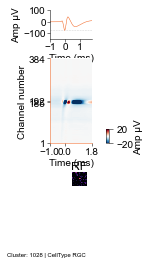

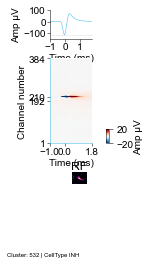

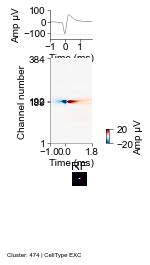

In [16]:
# 1 D) Waveforms and RFs  
Fig1D_Data = np.load(data_dir + 'Fig1D_Data.npy', encoding='latin1', allow_pickle=True).item() 
RFs = Fig1D_Data['RFs'] 
Waveforms = Fig1D_Data['Waveforms'] 

cluster_ids =  [1028, 532, 474]
cl_labels = ['RGC', 'INH', 'EXC']
colors_array = [color_mpw, color_INH, color_EXC]

chs_neuropix = np.arange(384)

for idx, clus_id in enumerate(cluster_ids):
    
    lags_ms_interp = Waveforms[clus_id]['lags_ms_interp']
    clim_tmp = Waveforms[clus_id]['clim_tmp'] 
    ch = Waveforms[clus_id]['peak_channel'] 
    t_use = Waveforms[clus_id]['t_use'] 
    mcwf_chs_interp_compressed = Waveforms[clus_id]['mcwf_chs_interp_compressed'] 
    waveform1d_peakch = Waveforms[clus_id]['1D_waveform'] 
    
    cl_label_observer = cl_labels[idx] 
    color_tmp = colors_array[idx]
    
    fig = plt.figure(clus_id )
    plt.clf()
    fig.set_size_inches(fwidth_inch,fheight_inch)
    
    # Plot RF
    rf_tmp = RFs[clus_id].copy()
    comy, comx, rf_tmp_com = calc_rf_center( rf_tmp ,0.6)
    rf_window = 15    # crop RF
    
    ax = plt.axes([0.28,0.35,0.05,0.05])
    ax.tick_params(length=tick_length)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    pmesh = plt.pcolormesh(rf_tmp,rasterized=True,cmap=plt.cm.magma)
    plt.xlim([comx-rf_window,comx+rf_window])
    plt.ylim([comy-rf_window,comy+rf_window])
    
    plt.clim([0,1])
    plt.xticks([])
    plt.yticks([])
    plt.tick_params('both',pad=1)
    plt.title('RF',pad=2)
    
    # 1 D waveform
    time_lim = [-1.0, 1.8]  
    time_ticks = [-1.0,0,1.8] 
    tick_length = 3.
    ch_ticks = [1,192,384,ch] 
    ch_ticks.sort()
    
    cmap = plt.cm.RdBu_r

    ax = plt.axes([0.2,0.87,w,0.1])
    ax.tick_params(length=tick_length)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.plot(lags_ms_interp[t_use], waveform1d_peakch[t_use],color = color_tmp) #'k')
    plt.xlim(time_lim)
    
    plt.ylim([-150, 100])
    plt.xlabel('Time (ms)', labelpad=2)
    ax.set_ylabel('Amp \u03BCV', labelpad=2)
    plt.hlines(y=waveform1d_peakch.min(), xmin=-1, xmax= time_lim[-1] , colors='lightgray', linestyles='--')
    plt.tick_params('both',pad=1)

    # 2D waveform 
    ax_wf = plt.axes([0.2,0.50,w,h])
    ax_wf.tick_params(length=tick_length)
    ax_wf.spines['right'].set_visible(False)
    ax_wf.spines['top'].set_visible(False)
    ax_wf.spines['left'].set_color(color_tmp)
    ax_wf.spines['bottom'].set_color(color_tmp)
    pmesh_2d = plt.pcolormesh(lags_ms_interp[t_use],chs_neuropix[0::2], mcwf_chs_interp_compressed,cmap=cmap,rasterized=True)
    plt.xlim(time_lim)
    plt.clim(clim_tmp)
    plt.xticks(time_ticks)
    plt.yticks(ch_ticks)
    plt.xlabel('Time (ms)',labelpad=2)
    plt.ylabel('Channel number',labelpad=2) 
    plt.tick_params('both',pad=1)
    # colorbar
    ax_cbar_2d = plt.axes([0.4,0.5,0.01,0.05])
    cbar = plt.colorbar(pmesh_2d, cax= ax_cbar_2d, fraction=0.02,anchor=(0,0), ticks=[clim_tmp[0], clim_tmp[-1]])
    cbar.set_label('Amp \u03BCV',labelpad=1)

    fig.text(0.05, 0.1, 'Cluster: '+ str(clus_id) + ' | CellType '  + cl_label_observer , fontsize=fs)    
    
    # Save figure   
    #save_name = 'Figure1D_RF_Waveform_uV_ClimCBar_'
    #figure_name_pdf = data_dir + save_name  + '_ID_'+str(clus_id) + '_' + cl_label_observer +'.pdf'
    #plt.savefig(figure_name_pdf, dpi=200)  


## Plot Panel 1 G

1006
1006


/var/folders/yp/nrgrflqj3v5fjlhzgy_s18800000gn/T/ipykernel_9044/2049814982.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_FR.set_yticklabels([0, 0.5, 1])


Text(0.1, 0.87, 'Median MeanFR INHs: 3.63, Q1: 1.6, Q3: 8.02 ')

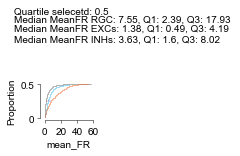

In [12]:
#  Figure 1G
Fig1G_Dict = np.load(data_dir + 'Fig1G_Data.npy' , encoding='latin1', allow_pickle=True).item()  # RFs 

mean_FR_NM_RGCs = Fig1G_Dict['mean_FR_NM_RGCs'] 
mean_FR_NM_EXCs= Fig1G_Dict['mean_FR_NM_EXCs']  
mean_FR_NM_INHs = Fig1G_Dict['mean_FR_NM_INHs']   
exc_idx_singleCl_GUIObservers_new = Fig1G_Dict['exc_idx'] 
inh_idx_singleCl_GUIObservers = Fig1G_Dict['inh_idx'] 
RGCs_pooled_perExp = Fig1G_Dict['RGCs_pooled_perExp'] 

quartiles = [0.25,0.5,0.75]
Q1_RGC, median_RGC, Q3_RGC = np.quantile(mean_FR_NM_RGCs, quartiles)
Q1_RGC = np.round(Q1_RGC,2)
Q3_RGC = np.round(Q3_RGC,2)
median_RGC = np.round(median_RGC,2)

quartiles = [0.25,0.5,0.75]
Q1_EXC, median_EXC, Q3_EXC = np.quantile(mean_FR_NM_EXCs, quartiles)
Q1_EXC = np.round(Q1_EXC,2)
Q3_EXC = np.round(Q3_EXC,2)
median_EXC = np.round(median_EXC,2)

quartiles = [0.25,0.5,0.75]
Q1_INH, median_INH, Q3_INH = np.quantile(mean_FR_NM_INHs, quartiles)
Q1_INH = np.round(Q1_INH,2)
Q3_INH = np.round(Q3_INH,2)
median_INH = np.round(median_INH,2)

rgc = len(mean_FR_NM_RGCs)*['RGC'] 
inh = len(mean_FR_NM_INHs)*['INH']
exc = len(mean_FR_NM_EXCs)*['EXC']
cell_types = rgc + inh + exc
print(len(cell_types))

mean_FR_all = mean_FR_NM_RGCs + list(mean_FR_NM_INHs) + list(mean_FR_NM_EXCs)
print(len(mean_FR_all))

df_MeanFR = pd.DataFrame()
df_MeanFR['mean_FR']  = mean_FR_all
df_MeanFR['cell_types']  = cell_types

colors = [color_mpw, color_INH, color_EXC]
w_mean = 0.18 
h_mean = 0.12 

fig = plt.figure()
plt.clf()
fig.set_size_inches(fwidth_inch,fheight_inch)

ax_FR = plt.axes([0.2,0.6, w_mean, h_mean])
ax_FR.tick_params(length=tick_length)
ax_FR.spines['right'].set_visible(False)
ax_FR.spines['top'].set_visible(False)
sns.ecdfplot(data=df_MeanFR, x="mean_FR", hue="cell_types", stat = 'proportion' ,  palette=colors, legend=False)
mark = quartiles[1]
ax_FR.hlines(y= mark, xmin= median_EXC, xmax=median_INH, linewidth=lw, linestyles='dashed', color='red')
ax_FR.hlines(y= mark, xmin= median_EXC, xmax=median_RGC, linewidth=lw, linestyles='dashed', color='gray')
ax_FR.hlines(y= mark, xmin= median_INH, xmax=median_RGC, linewidth=lw, linestyles='dashed', color='blue')
ax_FR.set_xticks([0, 20, 40, 60])
ax_FR.set_xticklabels([0, 20, 40, 60])
ax_FR.set_yticklabels([0, 0.5, 1])

sns.despine(ax= ax_FR, offset=despine_offset , trim=True)

fig.text(0.1, 0.97, 'Quartile selecetd: %s '%mark)
fig.text(0.1, 0.94, 'Median MeanFR RGC: %s, Q1: %s, Q3: %s '%(median_RGC, Q1_RGC, Q3_RGC))
fig.text(0.1, 0.91, 'Median MeanFR EXCs: %s, Q1: %s, Q3: %s '%(median_EXC, Q1_EXC, Q3_EXC))
fig.text(0.1, 0.87, 'Median MeanFR INHs: %s, Q1: %s, Q3: %s '%(median_INH, Q1_INH, Q3_INH))

## 1G Pie Chart

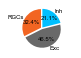

In [13]:
# Pie Chart 
n_experiments = 11 

n_RGCs_pooled= np.sum(RGCs_pooled_perExp)
n_INHs_pooled = inh_idx_singleCl_GUIObservers.sum()
n_EXCs_pooled = exc_idx_singleCl_GUIObservers_new.sum()

labels = 'RGCs',  'Exc', 'Inh'
sizes = [n_RGCs_pooled, n_EXCs_pooled, n_INHs_pooled]
explode = [0.05]*len(labels)
colors = [color_mpw, 'dimgray', 'deepskyblue']

ax1 = plt.axes([0.6,0.6,0.15,0.15])
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 6},
        colors = colors, shadow=False, startangle=90)
ax1.axis('equal')  
fig.text(0.1, 0.1, 'Pooled %s Experiments '%(n_experiments))
fig.text(0.1, 0.12, 'Total n RGC clusters: %s'%(n_RGCs_pooled))
fig.text(0.1, 0.14, 'Total n EXC clusters: %s'%(n_EXCs_pooled))
fig.text(0.1, 0.16, 'Total n INH clusters:  %s'%(n_INHs_pooled))
fig.text(0.1, 0.18, 'Total clusters (E+I) : %s'%(n_INHs_pooled +n_EXCs_pooled))

plt.tick_params('both',pad=1)

# Save figure 
#plt.savefig(data_dir + 'Figure1G_CumulativeDistribution_MeanFR' + '.pdf', dpi=200)


##  Write data as .xlsx file

In [14]:
#  Write data as .xlsx
data_df = df_MeanFR

sheet_name = 'fig1G'
file_name =  data_dir + 'data_source_fig1D.xlsx'  
writer = pd.ExcelWriter(file_name)

data_df.to_excel(writer,sheet_name=sheet_name,startcol=0)

writer.close()